<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/indicator/nse_pe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_fundamental.csv")

In [3]:
data=data.tail(750)

In [4]:
data.set_index('Date',inplace=True)

In [5]:
#data.set_index('Date',inplace=True)
data['mov50']= data['feat_Div_Yield'].rolling(window=18).mean()

In [6]:
data.tail(2)

,feat_PE,feat_PB,feat_Div_Yield,Open,High,Low,Close,mov50
Date,,,,,,,,
03-Jul-25,22.87,3.68,1.25,25505.10,25587.50,25384.35,25405.3,1.179444
04-Jul-25,22.92,3.69,1.28,25428.85,25470.25,25331.65,25461.0,1.185000


In [7]:
#data[['feat_Div_Yield','feat_PB','feat_PE','Open','High','Low','Close']].to_csv('data_fundamental.csv')

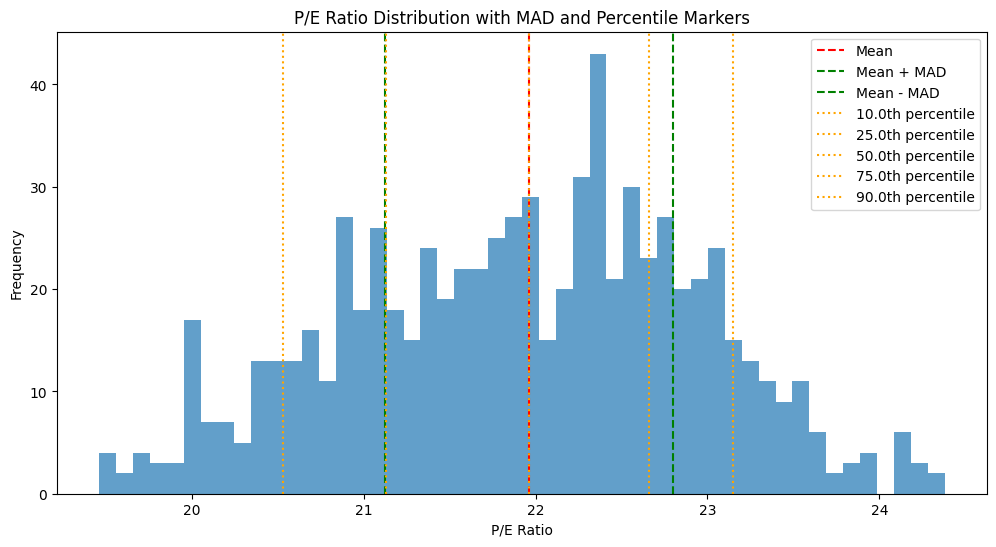

Mean P/E: 21.96
MAD: 0.84
Percentiles:
0.10    20.529
0.25    21.130
0.50    21.960
0.75    22.660
0.90    23.150
Name: feat_PE, dtype: float64

Current P/E: 22.92
MAD Score: 1.15 MADs from mean
Percentile Score: 83.07th percentile


In [8]:
# Assume 'pe_ratios' is your time series of P/E ratios
pe_ratios = data['feat_PE']

# Calculate mean and MAD
mean_pe = pe_ratios.median()
mad_pe = (pe_ratios - mean_pe).abs().mean()

# Calculate percentiles
percentiles = pe_ratios.quantile([0.1, 0.25, 0.5, 0.75, 0.9])
data['percentile']=percentiles
# Plot
plt.figure(figsize=(12, 6))
plt.hist(pe_ratios, bins=50, alpha=0.7)
plt.axvline(mean_pe, color='r', linestyle='dashed', label='Mean')
plt.axvline(mean_pe + mad_pe, color='g', linestyle='dashed', label='Mean + MAD')
plt.axvline(mean_pe - mad_pe, color='g', linestyle='dashed', label='Mean - MAD')

for p, v in percentiles.items():
    plt.axvline(v, color='orange', linestyle=':', label=f'{p*100}th percentile')

plt.title('P/E Ratio Distribution with MAD and Percentile Markers')
plt.xlabel('P/E Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f"Mean P/E: {mean_pe:.2f}")
print(f"MAD: {mad_pe:.2f}")
print("Percentiles:")
print(percentiles)

# Evaluate current P/E
current_pe = data['feat_PE'].iloc[-1]  # Example current P/E
mad_score = (current_pe - mean_pe) / mad_pe
percentile_score = sum(pe_ratios < current_pe) / len(pe_ratios) * 100

print(f"\nCurrent P/E: {current_pe}")
print(f"MAD Score: {mad_score:.2f} MADs from mean")
print(f"Percentile Score: {percentile_score:.2f}th percentile")

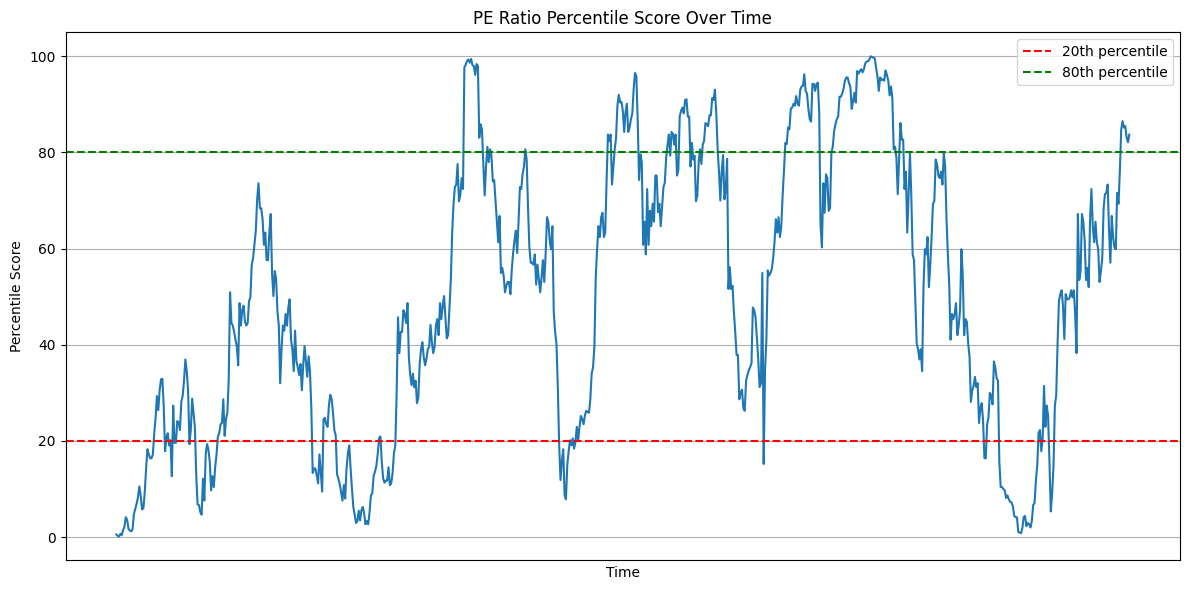

In [9]:
from scipy import stats

# Assuming you have a DataFrame 'df' with 'date' and 'pe' columns
# If not, you can create a sample DataFrame like this:
# df = pd.DataFrame({
#     'date': pd.date_range(start='2020-01-01', periods=100, freq='D'),
#     'pe': np.random.uniform(10, 30, 100)
# })

# Calculate percentile scores
data['pe_percentile'] = stats.percentileofscore(data['feat_PE'], data['feat_PE'], kind='weak')


# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(data['pe_percentile'].tail(1200))
plt.title('PE Ratio Percentile Score Over Time')
plt.xlabel('Time')  # You can remove this line if you don't want any x-axis label
plt.ylabel('Percentile Score')
plt.grid(True)

# Remove x-axis ticks and labels
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().xaxis.set_minor_locator(plt.NullLocator())

# Add horizontal lines at 20th and 80th percentiles
plt.axhline(y=20, color='r', linestyle='--', label='20th percentile')
plt.axhline(y=80, color='g', linestyle='--', label='80th percentile')

plt.legend()
plt.tight_layout()
plt.show()

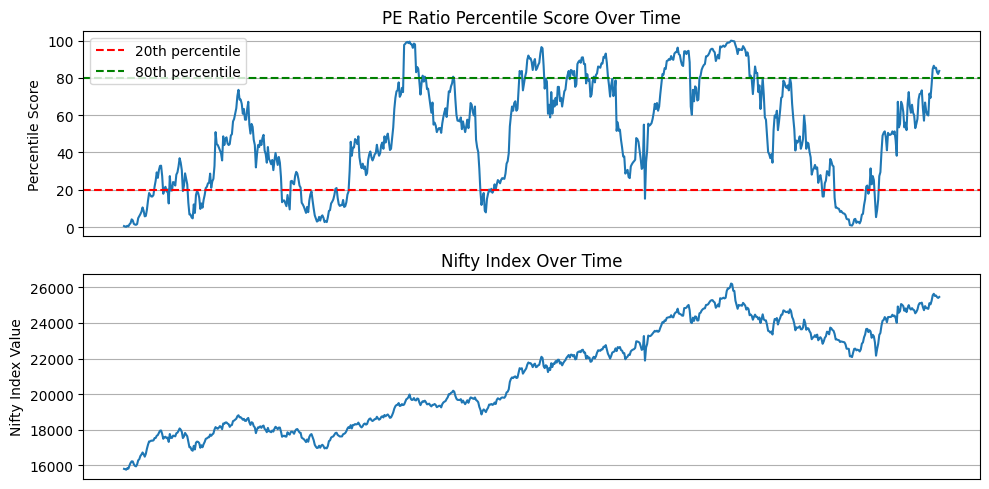

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with columns: 'pe_percentile' and 'nifty'
# If it's not, you might need to prepare your data accordingly

# Create the plot with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5), sharex=True)

# Plot PE Percentile Score
ax1.plot(data['pe_percentile'].tail(1800))
ax1.set_title('PE Ratio Percentile Score Over Time')
ax1.set_ylabel('Percentile Score')
ax1.grid(True)
ax1.axhline(y=20, color='r', linestyle='--', label='20th percentile')
ax1.axhline(y=80, color='g', linestyle='--', label='80th percentile')
ax1.legend()

# Plot Nifty Index
ax2.plot(data['Close'].tail(1800))
ax2.set_title('Nifty Index Over Time')
ax2.set_ylabel('Nifty Index Value')
ax2.grid(True)

# Remove x-axis ticks and labels
ax1.xaxis.set_major_locator(plt.NullLocator())
ax1.xaxis.set_minor_locator(plt.NullLocator())
ax2.xaxis.set_major_locator(plt.NullLocator())
ax2.xaxis.set_minor_locator(plt.NullLocator())

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [11]:
data=data.tail(1200)

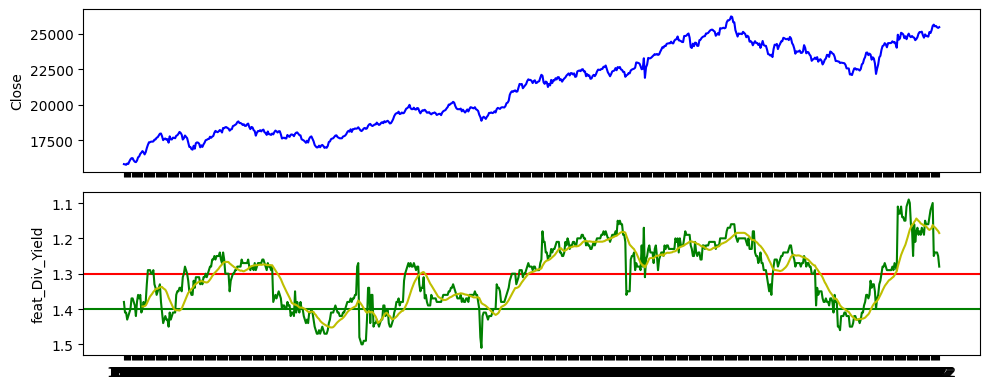

In [12]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
axs[1].axhline(y=1.4,color='g');
axs[1].axhline(y=1.3,color='r');
# Plot 'Close'
axs[0].plot(data['Close'], color='b')
axs[0].set_ylabel('Close')

# Plot 'Div Yield'
axs[1].plot( data['feat_Div_Yield'],  color='g')
axs[1].set_ylabel('feat_Div_Yield')
axs[1].plot(data['mov50'],color='y')
axs[1].invert_yaxis()
# Format date on x-axis to show only month and year
date_format = mdates.DateFormatter('%Y')
axs[1].xaxis.set_major_formatter(date_format)

# Display the plot
plt.tight_layout()
plt.show()

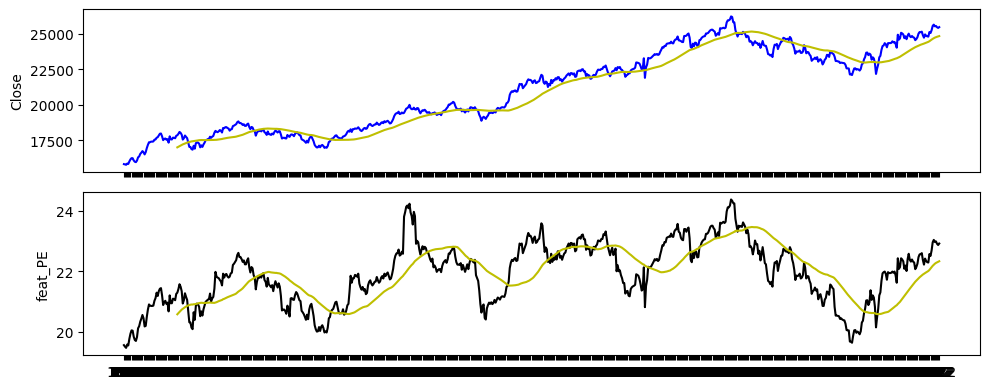

In [14]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 4), sharex=True)
# Plot 'Close'
axs[0].plot(data['Close'], color='b')
axs[0].set_ylabel('Close')

# Plot 'Div Yield'
axs[1].plot( data['feat_PE'],  color='k')
axs[1].set_ylabel('feat_PE')
axs[1].plot(data['feat_PE'].rolling(window=50).mean(),color='y')
axs[0].plot(data['Close'].rolling(window=50).mean(),color='y')
#axs[1].invert_yaxis()
# Format date on x-axis to show only month and year
date_format = mdates.DateFormatter('%Y')
axs[1].xaxis.set_major_formatter(date_format)

# Display the plot
plt.tight_layout()
plt.show()

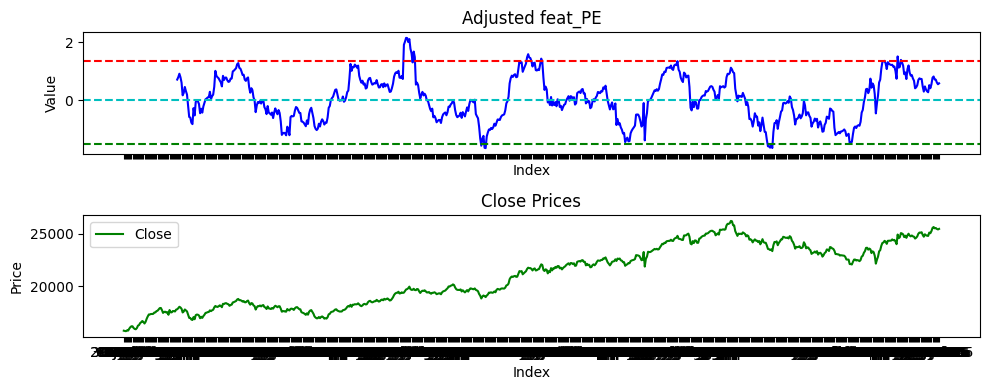

In [17]:
import matplotlib.pyplot as plt

# Assuming 'data' is a pandas DataFrame already loaded with the necessary columns: 'feat_PE' and 'Close'

# Compute the rolling mean adjustment for 'feat_PE'
adjusted_feat_PE = -1 * (data['feat_PE'].rolling(window=50).mean() - data['feat_PE'])

# Create the subplots
fig, axes = plt.subplots(2, 1, figsize=(10,4),sharex=True)

# Plot the adjusted 'feat_PE' in the first subplot
axes[0].plot(adjusted_feat_PE, label='Adjusted feat_PE', color='blue')
axes[0].axhline(y=0, color='c', linestyle='--', label='0')
axes[0].axhline(y=-1.5, color='g', linestyle='--', label='-1.5')
axes[0].axhline(y=1.35, color='r', linestyle='--', label='1.5')
axes[0].set_title("Adjusted feat_PE")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")
#axes[0].legend()

# Plot 'Close' in the second subplot
axes[1].plot(data['Close'], label='Close', color='green')
axes[1].set_title("Close Prices")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Price")
axes[1].legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
